## 1850200-黄天洋-第十四周实验课-申优
# 实践课14
## 1&emsp;内容
#### 1.&emsp;欧拉方法&ensp;e1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def ode_euler(f,a,b,y0,n):
    h=(b-a)/n
    y_it=np.zeros(n+1)
    y_it[0]=y0
    x=a
    y=y0
    for i in range(n):
        y+=h*f(x,y)
        x+=h
        y_it[i+1]=y
    return y_it

def f(x,y):return y-2*x/y
n=10
y=ode_euler(f,0,1,1,n)
print('欧拉法的数值解为',y)

x=np.linspace(0,1,n+1)
plt.plot(x,y,color='red',linewidth=1.5,label='h=0.1')
plt.axhline(1.0, color='gray', linewidth=3, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(1, color='black')
plt.title("(Euler)Solution to y'=y-2x/y in [0,1]")
plt.legend()
plt.show()

欧拉法的数值解为 [1.         1.1        1.19181818 1.27743783 1.3582126  1.43513292
 1.50896625 1.58033824 1.64978343 1.71777935 1.78477083]


<Figure size 640x480 with 1 Axes>

#### 2.&emsp;改进的欧拉方法和标准4阶龙格库塔公式&ensp;e3

改进欧拉法的数值解为 [1.         1.09590909 1.18409657 1.26620136 1.34336015 1.41640193
 1.4859556  1.55251409 1.61647478 1.67816636 1.7378674 ]


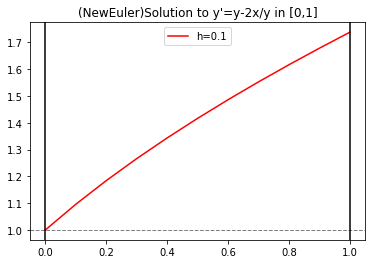

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def ode_neweuler(f,a,b,y0,n):
    h=(b-a)/n
    y_it=np.zeros(n+1)
    y_it[0]=y0
    x=a
    y=y0
    for i in range(n):
        yp=y+h*f(x,y)
        x+=h
        yc=y+h*f(x,yp)
        y=0.5*(yp+yc)
        y_it[i+1]=y
    return y_it

def f(x,y):return y-2*x/y
n=10
y=ode_neweuler(f,0,1,1,n)
print('改进欧拉法的数值解为',y)

x=np.linspace(0,1,n+1)
plt.plot(x,y,color='red',linewidth=1.5,label='h=0.1')
plt.axhline(1.0, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(1, color='black')
plt.title("(NewEuler)Solution to y'=y-2x/y in [0,1]")
plt.legend()
plt.show()

四阶龙格库塔方法的数值解为 [1.         1.         1.09544553 1.18321675 1.26491223 1.34164235
 1.41421558 1.48324222 1.54919645 1.61245535 1.67332466]


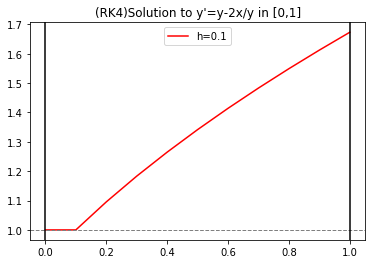

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def ode_rk4(f,a,b,y0,n):
    h=(b-a)/n
    y_it=np.zeros(n+1)
    y_it[0]=y0
    x=a
    y=y0
    for i in range(n):
        if y>=20:
            y_it[i+1]=y_it[i]
            continue
        else:
            y_it[i+1]=y
        k1=h*f(x,y)
        k2=h*f(x+h/2,y+k1/2)
        k3=h*f(x+h/2,y+k2/2)
        k4=h*f(x+h,y+k3)
        y+=(k1+2*k2+2*k3+k4)/6
        x+=h
    return y_it

def f(x,y):return y-2*x/y
n=10
y=ode_rk4(f,0,1,1,n)
print('四阶龙格库塔方法的数值解为',y)

x=np.linspace(0,1,n+1)
plt.plot(x,y,color='red',linewidth=1.5,label='h=0.1')
plt.axhline(1.0, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(1, color='black')
plt.title("(RK4)Solution to y'=y-2x/y in [0,1]")
plt.legend()
plt.show()

#### 3.&emsp;亚当斯巴什福思公式&ensp;e4

亚当斯巴什福思的数值解为 [1.         1.09590909 1.18409657 1.26620136 1.34305232 1.415762
 1.48502213 1.55126649 1.61487006 1.67615678 1.73539231]


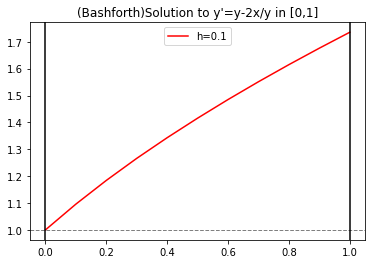

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def ode_adamsbashforth(f,a,b,y0,n):
    h=(b-a)/n
    y_it=np.zeros(n+1)
    y_it[0]=y0
    x=a
    y=y0
    for i in range(3):
        yp=y+h*f(x,y)
        x+=h
        yc=y+h*f(x,yp)
        y=0.5*(yp+yc)
        y_it[i+1]=y
    for i in range(3,n):
        x+=h
        y=y_it[i]+h/24*(55*f(x-h,y_it[i])-59*f(x-2*h,y_it[i-1])+37*f(x-3*h,y_it[i-2])-9*f(x-4*h,y_it[i-3]))
        y_it[i+1]=y
    return y_it

def f(x,y):return y-2*x/y
n=10
y=ode_adamsbashforth(f,0,1,1,n)
print('亚当斯巴什福思的数值解为',y)

x=np.linspace(0,1,n+1)
plt.plot(x,y,color='red',linewidth=1.5,label='h=0.1')
plt.axhline(1.0, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(1, color='black')
plt.title("(Bashforth)Solution to y'=y-2x/y in [0,1]")
plt.legend()
plt.show()

#### 4.&emsp;亚当斯莫尔顿公式&ensp;e5

亚当斯莫尔顿的数值解为 [1.         1.09590909 1.18409657 1.26593038 1.34281755 1.41557955
 1.48483196 1.55105622 1.61463813 1.67589383 1.73508785]


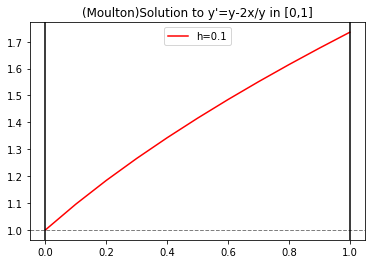

In [6]:
import numpy as np
from scipy.optimize import root,fsolve
import matplotlib.pyplot as plt
def ode_adamsmoulton(f,a,b,y0,n):
    h=(b-a)/n
    y_it=np.zeros(n+1)
    y_it[0]=y0
    x=a
    y=y0
    for i in range(2):
        yp=y+h*f(x,y)
        x+=h
        yc=y+h*f(x,yp)
        y=0.5*(yp+yc)
        y_it[i+1]=y
    for i in range(2,n):
        x+=h
        def fy(y):
            return y_it[i]+h/24*(9*f(x,y)+19*f(x-h,y_it[i])-5*f(x-2*h,y_it[i-1])+f(x-3*h,y_it[i-2]))-y
        y=fsolve(fy,y)
        y_it[i+1]=y
    return y_it

def f(x,y):return y-2*x/y
n=10
y=ode_adamsmoulton(f,0,1,1,n)
print('亚当斯莫尔顿的数值解为',y)

x=np.linspace(0,1,n+1)
plt.plot(x,y,color='red',linewidth=1.5,label='h=0.1')
plt.axhline(1.0, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(1, color='black')
plt.title("(Moulton)Solution to y'=y-2x/y in [0,1]")
plt.legend()
plt.show()

#### 5.&emsp;常微分方程组&ensp;e8

u的数值解为 [0.         0.01       0.0201     ... 0.11145781 0.11133355 0.11120956]
v的数值解为 [ 1.          1.01        1.01999899 ... -0.01242636 -0.01239864
 -0.01237101]


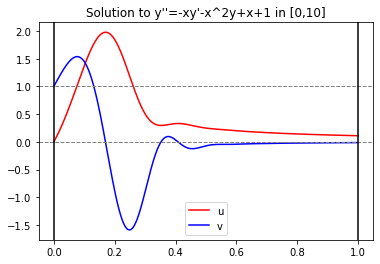

In [7]:
import numpy as np
def odevec_euler(f1,f2,a,b,y0,n):
    h=(b-a)/n
    y1_it=np.zeros(n+1)
    y2_it=np.zeros(n+1)
    y1_it[0]=y0[0]
    y2_it[0]=y0[1]
    x=a
    for i in range(n):
        y1_it[i+1]=y1_it[i]+h*f1(x,y1_it[i],y2_it[i])
        y2_it[i+1]=y2_it[i]+h*f2(x,y1_it[i],y2_it[i])
        x+=h
    return y1_it,y2_it

def odevec_runge(f1,f2,a,b,y0,n):
    h=(b-a)/n
    y1_it=np.zeros(n+1)
    y2_it=np.zeros(n+1)
    y1_it[0]=y0[0]
    y2_it[0]=y0[1]
    x=a
    for i in range(n):
        k11=h*f1(x,y1_it[i],y2_it[i])
        k12=h*f1(x+h/2,y1_it[i]+k11/2,y2_it[i]+k11/2)
        k13=h*f1(x+h/2,y1_it[i]+k12/2,y2_it[i]+k12/2)
        k14=h*f1(x+h,y1_it[i]+k13,y2_it[i]+k13)
        y1=y1_it[i]+(k11+2*k12+2*k13+k14)/6
        y1_it[i+1]=y1
        k21=h*f2(x,y1_it[i],y2_it[i])
        k22=h*f2(x+h/2,y1_it[i]+k21/2,y2_it[i]+k21/2)
        k23=h*f2(x+h/2,y1_it[i]+k22/2,y2_it[i]+k22/2)
        k24=h*f2(x+h,y1_it[i]+k23,y2_it[i]+k23)
        y2=y2_it[i]+(k21+2*k22+2*k23+k24)/6
        y2_it[i+1]=y2
        x+=h
    return y1_it,y2_it

def f1(x,y1,y2):return y2
def f2(x,y1,y2):return -x**2*y1-x*y2+x+1
n=1000
y1_it,y2_it=odevec_euler(f1,f2,0,10,np.array([0,1]),n)
print('u的数值解为',y1_it)
print('v的数值解为',y2_it)

x=np.linspace(0,1,n+1)
plt.plot(x,y1_it,color='red',linewidth=1.5,label='u')
plt.plot(x,y2_it,color='blue',linewidth=1.5,label='v')
plt.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.axhline(1.0, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(1, color='black')
plt.title("Solution to y''=-xy'-x^2y+x+1 in [0,10]")
plt.legend()
plt.show()

## 2&emsp;练习
#### 1.&emsp;分别取步长$h=0.25,0.125,0.0625$，并用梯形方法，标准4阶龙格库塔方法和4步亚当斯巴什福思公式，求解初值问题
$$\begin{cases}
u'=u+u^2\quad t\in(0,4]\\
u(0)=1/15\\
\end{cases}$$

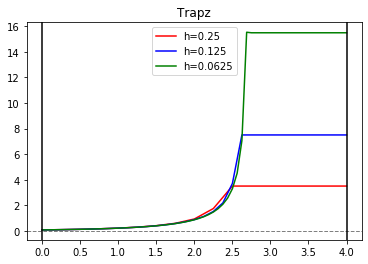

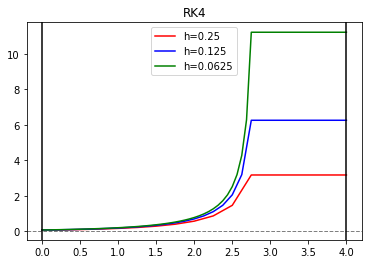

C:\Users\mpure\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\Users\mpure\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


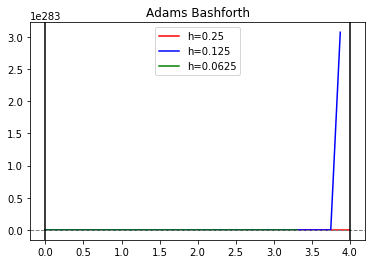

In [26]:
import numpy as np
def ode_trapz(f,a,b,y0,n):
    g=lambda y,x,z:y-z-0.5*h*(f(x,z)+f(x+h,y))
    h=(b-a)/n
    y_it=np.zeros(n+1)
    y_it[0]=y0
    x=a
    y=y0
    for i in range(n):
        def g(y):
            return y-(y_it[i]+h/2*(f(x+h,y)+f(x,y_it[i])))
        y=fsolve(g,y)
        x+=h
        y1=y
        y_it[i+1]=y
    return y_it

def f(x,y):return y+y**2
x1=np.linspace(0,4,int(4/0.25)+1)
x2=np.linspace(0,4,int(4/0.125)+1)
x3=np.linspace(0,4,int(4/0.0625)+1)

y1=ode_trapz(f,0,4,1/15,int(4/0.25))
y2=ode_trapz(f,0,4,1/15,int(4/0.125))
y3=ode_trapz(f,0,4,1/15,int(4/0.0625))
plt.plot(x1,y1,color='red',linewidth=1.5,label='h=0.25')
plt.plot(x2,y2,color='blue',linewidth=1.5,label='h=0.125')
plt.plot(x3,y3,color='green',linewidth=1.5,label='h=0.0625')
plt.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(4, color='black')
plt.title('Trapz')
plt.legend()
plt.show()

y_r1=ode_rk4(f,0,4,1/15,int(4/0.25))
y_r2=ode_rk4(f,0,4,1/15,int(4/0.125))
y_r3=ode_rk4(f,0,4,1/15,int(4/0.0625))
plt.plot(x1,y_r1,color='red',linewidth=1.5,label='h=0.25')
plt.plot(x2,y_r2,color='blue',linewidth=1.5,label='h=0.125')
plt.plot(x3,y_r3,color='green',linewidth=1.5,label='h=0.0625')
plt.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(4, color='black')
plt.title('RK4')
plt.legend()
plt.show()

y_a1=ode_adamsbashforth(f,0,4,1/15,int(4/0.25))
y_a2=ode_adamsbashforth(f,0,4,1/15,int(4/0.125))
y_a3=ode_adamsbashforth(f,0,4,1/15,int(4/0.0625))
plt.plot(x1,y_a1,color='red',linewidth=1.5,label='h=0.25')
plt.plot(x2,y_a2,color='blue',linewidth=1.5,label='h=0.125')
plt.plot(x3,y_a3,color='green',linewidth=1.5,label='h=0.0625')
plt.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(4, color='black')
plt.title('Adams Bashforth')
plt.legend()
plt.show()

#### 2.&emsp;用任意一种精度不低于三阶的方法求解初值问题
$$\begin{cases}
x'=4x-2xy\quad t\in(0,5]\\
y'=xy-3y\quad t\in(0,5]\\
x(0)=3,y(0)=5\\
\end{cases}$$

In [1]:
import numpy as np
def f1(x,y1,y2):return 4*y1-2*y1*y2
def f2(x,y1,y2):return y1*y2-3*y2
n=1000
y1_it,y2_it=odevec_runge(f1,f2,0,5,np.array([3,5]),n)
print('u的数值解为',y1_it)
print('v的数值解为',y2_it)

x=np.linspace(0,5,n+1)
plt.plot(x,y1_it,color='red',linewidth=1.5,label='u')
plt.plot(x,y2_it,color='blue',linewidth=1.5,label='v')
plt.axhline(3, color='gray', linewidth=1, linestyle='--')
plt.axhline(5, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(5, color='black')
plt.title("Solution to x'=4x-2xy;y'=xy-3y in [0,5]")
plt.legend()
plt.show()

NameError: name 'odevec_runge' is not defined

#### 3.&emsp;用四阶亚当斯预估校正各式
$P\quad u_{n+4}^p=u_{n+3}+\frac{h}{24}(55\overline{f}_{n+3}-59\overline{f}_{n+2}+37\overline{f}_{n+1}-9\overline{f}_n)$<br/>
$M\quad u_{n+4}^{p,m}=u_{n+4}^p+\frac{251}{270}(u_{n+3}^c-u_{n+3}^p)$<br/>
$E\quad \hat{f}_{n+4}=f(t_{n+4},u_{p+4}^{p,m})$<br/>
$C\quad u_{n+4}^c=u_{n+3}+\frac{h}{24}(9\hat{f}_{n+4}+19\overline{f}_{n+3}-5\overline{f}_{n+2}+\overline{f}_{n+1})$<br/>
$M\quad u_{n+4}=u_{n+4}^c-\frac{19}{270}(u_{n+4}^c-u_{n+4}^p)$<br/>
$E\quad \overline{f_{n+4}}=f(t_{n+4},u_{p+4})$<br/>
求解初值问题
$$\begin{cases}
u'=u-t^2+1\quad t\in(0,2]\\
u(0)=0.5\\
\end{cases}$$

亚当斯预估校正的数值解为 [0.5        0.657      0.828435   1.01372068 1.21259082 1.42398638
 1.64711359 1.88110424 2.12499747 2.37773133 2.63813217 2.90490292
 3.17661007 3.45166937 3.72832996 4.00465681 4.2785114  4.54753029
 4.8091015  5.0603383  5.2980504 ]


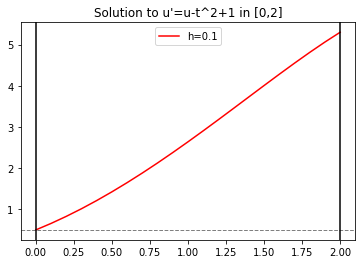

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def ode_adamsestimate(f,a,b,y0,n):
    h=(b-a)/n
    y_it=np.zeros(n+1)
    y_it[0]=y0
    x=a
    y=y0
    for i in range(3):
        yp=y+h*f(x,y)
        x+=h
        yc=y+h*f(x,yp)
        y=0.5*(yp+yc)
        y_it[i+1]=y
    for i in range(3,n):
        x+=h
        ytemp=y_it[i]+h/24*(55*f(x-h,y_it[i])-59*f(x-2*h,y_it[i-1])+37*f(x-3*h,y_it[i-2])-9*f(x-4*h,y_it[i-3]))
        def fy(y):
            return y_it[i]+h/24*(9*f(x,y)+19*f(x-h,y_it[i])-5*f(x-2*h,y_it[i-1])+f(x-3*h,y_it[i-2]))-y
        y=fsolve(fy,ytemp)
        y_it[i+1]=y
    return y_it

def f(x,y):return y-x**2+1
n=20
y=ode_adamsestimate(f,0,2,0.5,n)
print('亚当斯预估校正的数值解为',y)

x=np.linspace(0,2,n+1)
plt.plot(x,y,color='red',linewidth=1.5,label='h=0.1')
plt.axhline(0.5, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(2, color='black')
plt.title("Solution to u'=u-t^2+1 in [0,2]")
plt.legend()
plt.show()

## 3&emsp;作业
#### **1.&emsp;显格式与隐格式**
实验目的：显格式与隐格式<br/>
实验内容：分别用欧拉方法梯形公式改进的欧拉方法以及标准4阶龙格库塔方法求解初值问题。
$$\begin{cases}
y'=-\frac{1}{x^2}-\frac{y}{x}-y^2\quad x\in(1,2]\\
y(1)=-1\\
\end{cases}$$
比较四种方法的计算精度，并且体会显格式与隐格式的区别

欧拉法的数值解为 [-1.         -1.1        -1.20364463 -1.31766139 -1.44909758 -1.60659939
 -1.80205337 -2.05322717 -2.38862536 -2.85734126 -3.55109562]
梯形公式的数值解为 [-1.         -1.10194825 -1.21152844 -1.33667013 -1.48715941 -1.67708965
 -1.92940846 -2.28616495 -2.83647365 -3.81742112 -6.29733831]
改进欧拉方法的数值解为 [-1.         -1.10182231 -1.21093296 -1.3350268  -1.48340581 -1.66911406
 -1.91263522 -2.24951478 -2.74847457 -3.56203016 -5.10321016]
龙格库塔方法的数值解为 [-1.         -1.         -1.10128267 -1.21007515 -1.33408779 -1.48274937
 -1.66944258 -1.91549522 -2.25869838 -2.77457906 -3.64091601]


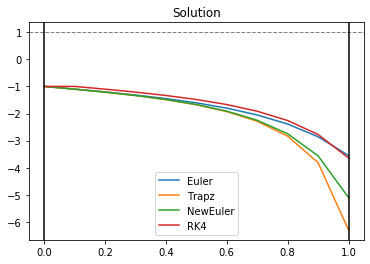

显格式计算简单快速，但是受步长限制，稳定性略差
隐格式需要解方程组，计算复杂，但是不受步长限制，稳定性好


In [27]:
import numpy as np

def f(x,y):return -1/x**2-y/x-y**2
n=10
y1=ode_euler(f,1,2,-1,n)
print('欧拉法的数值解为',y1)
y2=ode_trapz(f,1,2,-1,n)
print('梯形公式的数值解为',y2)
y3=ode_neweuler(f,1,2,-1,n)
print('改进欧拉方法的数值解为',y3)
y4=ode_rk4(f,1,2,-1,n)
print('龙格库塔方法的数值解为',y4)

x=np.linspace(0,1,n+1)
plt.plot(x,y1,linewidth=1.5,label='Euler')
plt.plot(x,y2,linewidth=1.5,label='Trapz')
plt.plot(x,y3,linewidth=1.5,label='NewEuler')
plt.plot(x,y4,linewidth=1.5,label='RK4')
plt.axhline(1.0, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(1, color='black')
plt.title("Solution")
plt.legend()
plt.show()

print('显格式计算简单快速，但是受步长限制，稳定性略差')
print('隐格式需要解方程组，计算复杂，但是不受步长限制，稳定性好')

#### **2.&emsp;刚性问题**
实验目的：刚性问题<br/>
实验内容：考虑刚性问题
$$\begin{cases}
y'=5e^{5x}(y-x)^2+1\quad x\in(0,1]\\
y(0)=-1\\
\end{cases}$$
该问题的真解$y(x)=x-e^{-5x}$，分别取步长$h=0.2,0.25$，用标准4阶龙格库塔方法和梯形公式求解该初值问题，并对计算结果进行分析。

h=0.2时梯形公式的数值解为 [-1.         -0.14149685  0.27486139  0.55398284  0.78307197  0.99377255]
h=0.25时梯形公式的数值解为 [-1.          0.00545572  0.42675716  0.72915281  0.99401991]
h=0.2时龙格库塔方法的数值解为 [-1.         -1.         -0.14885213  0.26848842  0.55199272  0.78228568]
h=0.25时龙格库塔方法的数值解为 [-1.         -1.          0.40143154  3.4374753   3.4374753 ]


C:\Users\mpure\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()
C:\Users\mpure\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


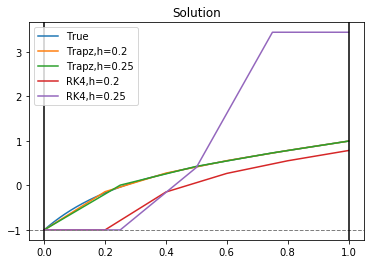

梯形公式能较好地收敛到真解，而龙格库塔方式则不能收敛，向无穷大趋近


In [29]:
import numpy as np

def f(x,y):return 5*np.e**(5*x)*(y-x)**2+1
n1=1/0.2
n2=1/0.25
y1=ode_trapz(f,0,1,-1,int(n1))
print('h=0.2时梯形公式的数值解为',y1)
y2=ode_trapz(f,0,1,-1,int(n2))
print('h=0.25时梯形公式的数值解为',y2)
y3=ode_rk4(f,0,1,-1,int(n1))
print('h=0.2时龙格库塔方法的数值解为',y3)
y4=ode_rk4(f,0,1,-1,int(n2))
print('h=0.25时龙格库塔方法的数值解为',y4)

x=np.linspace(0,1,500)
x1=np.linspace(0,1,n1+1)
x2=np.linspace(0,1,n2+1)
plt.plot(x,x-np.e**(-5*x),linewidth=1.5,label='True')
plt.plot(x1,y1,linewidth=1.5,label='Trapz,h=0.2')
plt.plot(x2,y2,linewidth=1.5,label='Trapz,h=0.25')
plt.plot(x1,y3,linewidth=1.5,label='RK4,h=0.2')
plt.plot(x2,y4,linewidth=1.5,label='RK4,h=0.25')
plt.axhline(-1, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(1, color='black')
plt.title("Solution")
plt.legend()
plt.show()
print('梯形公式能较好地收敛到真解，而龙格库塔方式则不能收敛，向无穷大趋近')

#### **3.&emsp;常微分方程组**
实验目的：常微分方程组<br/>
实验内容：尝试用不同的方法求解初值问题
$$\left(\begin{array}{c}u'\\ v'\\\end{array}\right)=
\left(\begin{array}{cc}32&66\\ -66&-133\\\end{array}\right)
\left(\begin{array}{c}u\\ v\\\end{array}\right)+
\left(\begin{array}{c}\frac23x+\frac23\\ -\frac13x+\frac13\\\end{array}\right)
\quad x\in(0,0.5]$$
初值条件为
$$\left(\begin{array}{c}u(0)\\ v(0)\\\end{array}\right)=
\left(\begin{array}{c}\frac13\\ \frac13\\\end{array}\right)$$
比较各种方法的计算结果和计算时间。<br/>
该问题的真解为$u=\frac23x+\frac23e^{-x}-\frac23e^{-100x},v=-\frac13x-\frac13e^{-x}+\frac23e^{-100x}$

欧拉方法的计算时间为 0.000997781753540039
u的数值解为 [0.33333333 1.         0.3512     1.01804267 0.36941515 1.03642684
 0.38796497 1.05513901 0.40683623 1.07416617 0.42601618 1.09349586
 0.44549261 1.11311609 0.46525376 1.13301536 0.48528838 1.15318261
 0.50558563 1.17360725 0.5261351  1.19427907 0.54692682 1.21518828
 0.56795119 1.2363255 ]
v的数值解为 [ 0.33333333 -0.98666667  0.3244     -0.995688    0.31529243 -1.00488009
  0.30601751 -1.01423617  0.29658189 -1.02374975  0.28699191 -1.03341459
  0.2772537  -1.04322471  0.26737312 -1.05317434  0.25735581 -1.06325797
  0.24720719 -1.07347029  0.23693245 -1.0838062   0.22653659 -1.09426081
  0.21602441 -1.10482941]


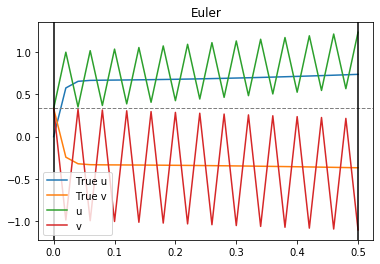

龙格公式的计算时间为 0.014959573745727539
u的数值解为 [0.33333333 0.35041517 0.3667149  ... 0.93812858 0.93839216 0.93865578]
v的数值解为 [ 0.33333333  0.30192195  0.27196221 ... -0.46220087 -0.46233263
 -0.46246441]


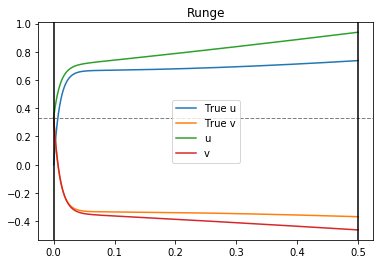

In [25]:
import numpy as np
import time

def f1(x,y1,y2):return 32*y1+66*y2+2/3*x+2/3
def f2(x,y1,y2):return -66*y1-133*y2-1/3*x+1/3
n=25
t1=time.time()
y1_it,y2_it=odevec_euler(f1,f2,0,0.5,np.array([1/3,1/3]),n)
print('欧拉方法的计算时间为',time.time()-t1)
print('u的数值解为',y1_it)
print('v的数值解为',y2_it)

x=np.linspace(0,0.5,n+1)
plt.plot(x,2/3*x+2/3*np.e**(-x)-2/3*np.e**(-100*x),linewidth=1.5,label='True u')
plt.plot(x,-1/3*x-1/3*np.e**(-x)+2/3*np.e**(-100*x),linewidth=1.5,label='True v')
plt.plot(x,y1_it,linewidth=1.5,label='u')
plt.plot(x,y2_it,linewidth=1.5,label='v')
plt.axhline(1/3, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(0.5, color='black')
plt.title("Euler")
plt.legend()
plt.show()

n=1000
t2=time.time()
y1_it,y2_it=odevec_runge(f1,f2,0,0.5,np.array([1/3,1/3]),n)
print('龙格公式的计算时间为',time.time()-t2)
print('u的数值解为',y1_it)
print('v的数值解为',y2_it)

x=np.linspace(0,0.5,n+1)
plt.plot(x,2/3*x+2/3*np.e**(-x)-2/3*np.e**(-100*x),linewidth=1.5,label='True u')
plt.plot(x,-1/3*x-1/3*np.e**(-x)+2/3*np.e**(-100*x),linewidth=1.5,label='True v')
plt.plot(x,y1_it,linewidth=1.5,label='u')
plt.plot(x,y2_it,linewidth=1.5,label='v')
plt.axhline(1/3, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(0.5, color='black')
plt.title("Runge")
plt.legend()
plt.show()